In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [8]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv") 

In [9]:
test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [10]:
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [11]:
train.shape

(750000, 9)

In [12]:
test.shape

(250000, 8)

In [13]:
train['Sex'] = train['Sex'].map({'male': 1, 'female': 2})
test['Sex'] = test['Sex'].map({'male': 1, 'female': 2})


In [14]:
# Veriyi kontrol edelim
print("Veri seti boyutu:", train.shape)
print("\nVeri seti kolonları:")
print(train.columns.tolist())
print("\nİlk 5 satır:")
print(train.describe())
train.head()

Veri seti boyutu: (750000, 9)

Veri seti kolonları:
['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

İlk 5 satır:
                  id            Sex            Age         Height  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000       1.500961      41.420404     174.697685   
std    216506.495284       0.499999      15.175049      12.824496   
min         0.000000       1.000000      20.000000     126.000000   
25%    187499.750000       1.000000      28.000000     164.000000   
50%    374999.500000       2.000000      40.000000     174.000000   
75%    562499.250000       2.000000      52.000000     185.000000   
max    749999.000000       2.000000      79.000000     222.000000   

              Weight       Duration     Heart_Rate      Body_Temp  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean       75.145668      15.421015      95.483995      40.036253   
std        13

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,1,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,2,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,2,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,1,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,2,38,166.0,61.0,25.0,102.0,40.6,146.0


Text(0, 0.5, 'Frekans')

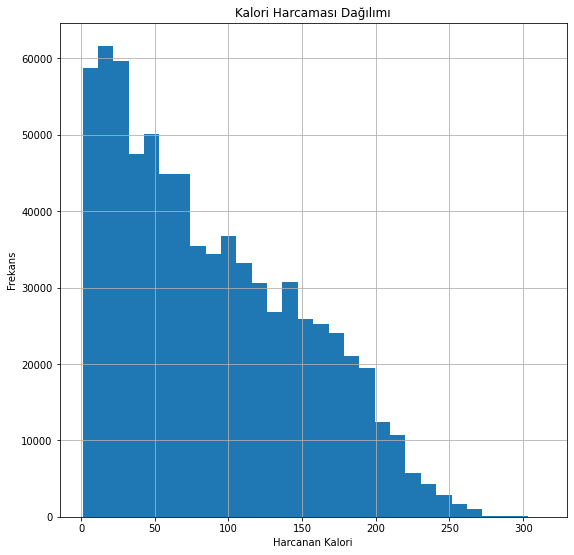

In [15]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
train['Calories'].hist(bins=30)
plt.title('Kalori Harcaması Dağılımı')
plt.xlabel('Harcanan Kalori')
plt.ylabel('Frekans')

Text(0, 0.5, 'Harcanan Kalori')

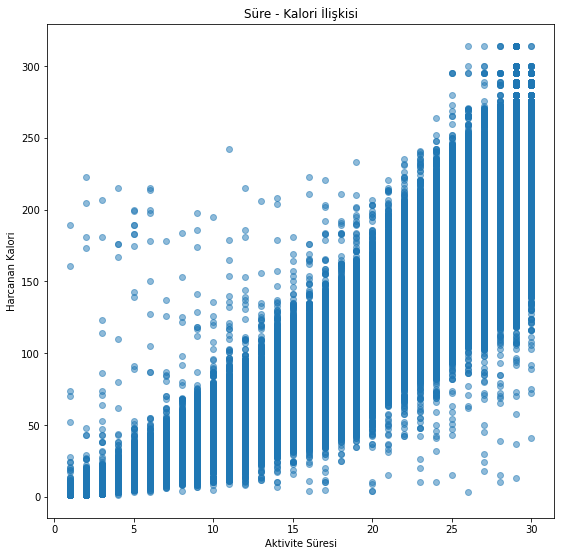

In [16]:
# 2. Aktivite süresine göre kalori harcaması
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 2)
plt.scatter(train['Duration'], train['Calories'], alpha=0.5)
plt.title('Süre - Kalori İlişkisi')
plt.xlabel('Aktivite Süresi')
plt.ylabel('Harcanan Kalori')

Text(0, 0.5, 'Harcanan Kalori')

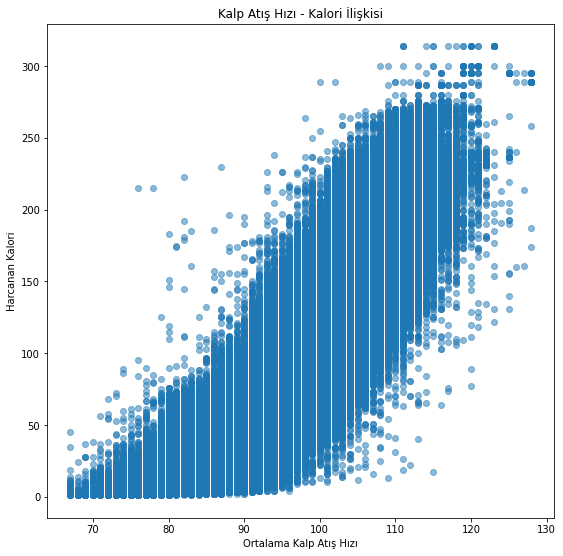

In [17]:
plt.figure(figsize=(20, 20))
# 3. Ortalama kalp atış hızına göre kalori harcaması
plt.subplot(2, 2, 3)
plt.scatter(train['Heart_Rate'], train['Calories'], alpha=0.5)
plt.title('Kalp Atış Hızı - Kalori İlişkisi')
plt.xlabel('Ortalama Kalp Atış Hızı')
plt.ylabel('Harcanan Kalori')

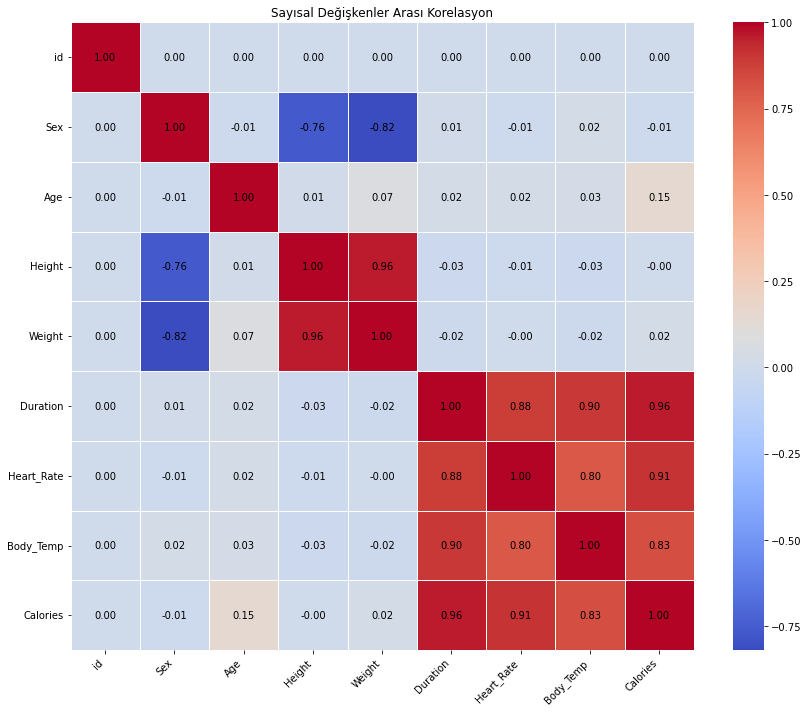

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Korelasyon matrisi
corr = train.corr().round(2)

# Grafik boyutu
plt.figure(figsize=(12, 10))

# Heatmap çiz (yazılar olmadan)
ax = sns.heatmap(corr, cmap="coolwarm", linewidths=0.5, annot=False)

# Yazıları kendimiz çiziyoruz
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        value = corr.iloc[i, j]
        ax.text(j + 0.5, i + 0.5, f"{value:.2f}", 
                ha='center', va='center', color='black', fontsize=10)

plt.title("Sayısal Değişkenler Arası Korelasyon")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Önemli Çıkarımlar:

Kalori yakımını en çok etkileyen faktör aktivite süresi

İkinci en önemli faktör kalp atış hızı

Cinsiyet, kalori yakımında çok belirleyici bir faktör değil
# Most Important Findings:

The most important factor affecting calorie burn is activity duration

The second most important factor is heart rate

Gender is not a very determinant factor in calorie burn


In [19]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [20]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  int64  
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 51.5 MB


In [21]:
train.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [22]:
X = train.drop(columns=['Calories','id'], axis=1)
y = train['Calories']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:

model = HistGradientBoostingRegressor(
    loss="squared_error",
    learning_rate=0.1,
    max_leaf_nodes=31,
    min_samples_leaf=20,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)
model.fit(X_train, y_train)

pred_valid = model.predict(X)
rmse = mean_squared_error(y, pred_valid, squared=False)
rmse

3.788468681108692

In [24]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:

r2  = model.score(X_val, y_val)  # R^2
pred_val = model.predict(X_val)
rmse = mean_squared_error(y_val, pred_val, squared=False)
mae  = mean_absolute_error(y_val, pred_val)
r2, rmse, mae

(0.9962549960852036, 3.8097500891844294, 2.3715933891089325)

In [26]:
# Test tahminlerini diğer kolonlarla birlikte göster (kaydetmeden)
pred = model.predict(test.drop(['id'], axis=1))

test_with_pred = test.copy()
test_with_pred['Calories_pred'] = pred

# İlk 20 satırı görelim
test_with_pred.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories_pred
0,750000,1,45,177.0,81.0,7.0,87.0,39.8,27.338383
1,750001,1,26,200.0,97.0,20.0,101.0,40.5,107.614717
2,750002,2,29,188.0,85.0,16.0,102.0,40.4,87.522340
3,750003,2,39,172.0,73.0,20.0,107.0,40.6,128.642448
4,750004,2,30,173.0,67.0,16.0,94.0,40.5,74.685710


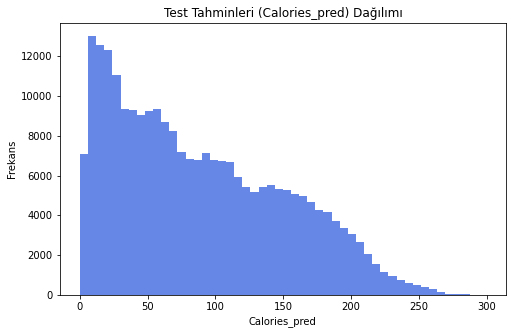

In [27]:
# 1) Histogram: tahmin dağılımı
plt.figure(figsize=(8,5))
plt.hist(test_with_pred['Calories_pred'].dropna(), bins=50, color='royalblue', alpha=0.8)
plt.title('Test Tahminleri (Calories_pred) Dağılımı')
plt.xlabel('Calories_pred'); plt.ylabel('Frekans')
plt.show()

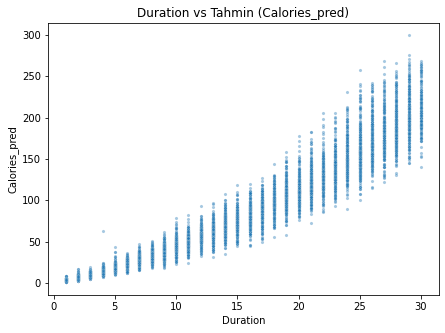

In [28]:
# 2) Scatter: Duration vs Calories_pred (en anlamlılardan biri)
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=test_with_pred.sample(n=10000, random_state=42),  # büyük veri -> örnekle
    x='Duration', y='Calories_pred', alpha=0.4, s=10
)
plt.title('Duration vs Tahmin (Calories_pred)')
plt.show()

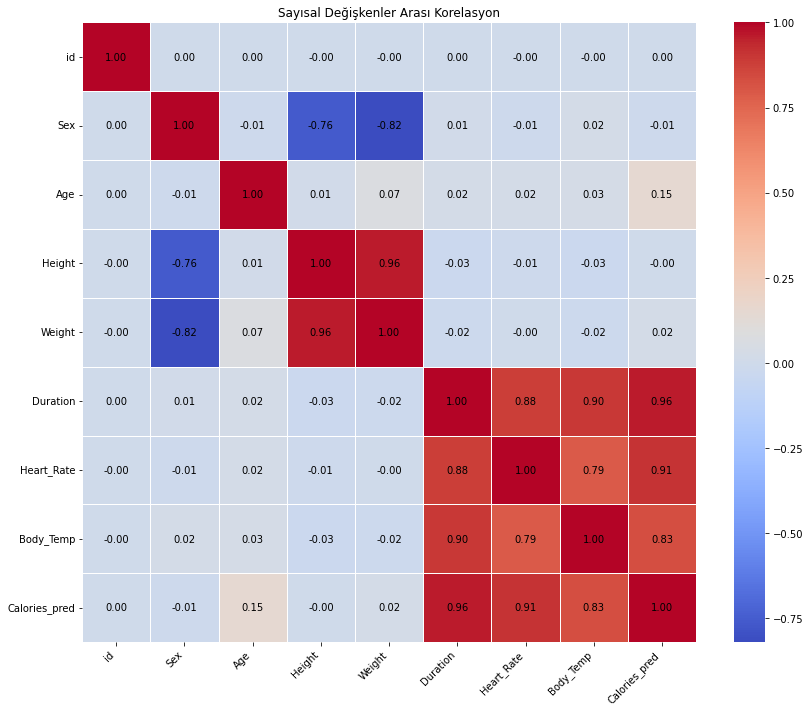

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Korelasyon matrisi
testcorr = test_with_pred.corr().round(2)

# Grafik boyutu
plt.figure(figsize=(12, 10))

# Heatmap çiz (yazılar olmadan)
ax = sns.heatmap(testcorr, cmap="coolwarm", linewidths=0.5, annot=False)

# Yazıları kendimiz çiziyoruz
for i in range(testcorr.shape[0]):
    for j in range(testcorr.shape[1]):
        value = testcorr.iloc[i, j]
        ax.text(j + 0.5, i + 0.5, f"{value:.2f}", 
                ha='center', va='center', color='black', fontsize=10)

plt.title("Sayısal Değişkenler Arası Korelasyon")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



## Değerlendirme Sonuçları
- __Doğrulama (hold-out)__:
  - R²: 0.9963
  - RMSE: 3.8098
  - MAE: 2.3716


## Sonuç
- Model (HGBR) doğrulamada __R²≈0.996__, __RMSE≈3.81__, __MAE≈2.37__ ile çok yüksek performans göstermektedir.


In [30]:
# Bu hücre, notebook'ta daha önce EĞİTİLMİŞ bir 'model' olduğunu varsayar.
# Sex sayısal (1=male, 2=female) beklenir.

import pandas as pd

# Özellik isimlerini belirle
try:
    feature_names = list(X.columns)  # Eğer X varsa, ondan al
except NameError:
    try:
        feature_names = [c for c in train.columns if c not in ['Calories', 'id']]  # train varsa, oradan al
    except NameError:
        # Eğitimde kullandığınız varsayılan sıralama
        feature_names = ['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

print("Değerleri giriniz (Height=cm, Weight=kg, Duration=dakika, Heart_Rate=bpm, Body_Temp=°C)")
sex = float(input("Sex (1=male, 2=female): "))
age = float(input("Age: "))
height = float(input("Height (cm): "))
weight = float(input("Weight (kg): "))
duration = float(input("Duration-Egzersiz süresi (dakika): "))
heart_rate = float(input("Heart_Rate (bpm): "))
body_temp = float(input("Body_Temp (°C): "))

row = pd.DataFrame(
    [[sex, age, height, weight, duration, heart_rate, body_temp]],
    columns=['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
)

# Eğitimde kullanılan özellik sırasına uydur
row = row.reindex(columns=feature_names, fill_value=0)

pred = model.predict(row)[0]
print(f"\nPredicted Calories: {pred:.4f}")

Değerleri giriniz (Height=cm, Weight=kg, Duration=dakika, Heart_Rate=bpm, Body_Temp=°C)


ValueError: could not convert string to float: ''

In [31]:
# LINEER FORMÜLÜ ÇIKARTMA (ayrı bir LinearRegression ile)
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1) Veriyi hazırla (Sex zaten sayısal olduğunu varsayıyoruz)
train_df = train.copy()  # notebook'ta train zaten yüklü
X_lin = train_df.drop(columns=['Calories', 'id'], errors='ignore')
y_lin = train_df['Calories']

# 2) Doğrusal modeli eğit
lin = LinearRegression()
lin.fit(X_lin, y_lin)

# 3) Formülü yazdır
features = list(X_lin.columns)
intercept = lin.intercept_
coefs = lin.coef_

eq_terms = [f"{coef:.6f}*{name}" for coef, name in zip(coefs, features)]
equation = "Calories = " + f"{intercept:.6f} + " + " + ".join(eq_terms)

print("Doğrusal Regresyon Formülü (yaklaşık):")
print(equation)

# İsteğe bağlı: katsayıları tablo halinde gör
coef_table = pd.DataFrame({"feature": features, "coef": coefs}).sort_values(by="coef", ascending=False)
coef_table

Doğrusal Regresyon Formülü (yaklaşık):
Calories = 506.754678 + 1.696382*Sex + 0.532076*Age + -0.146263*Height + 0.269649*Weight + 6.759609*Duration + 1.948669*Heart_Rate + -18.185385*Body_Temp


,feature,coef
4,Duration,6.759609
5,Heart_Rate,1.948669
0,Sex,1.696382
1,Age,0.532076
3,Weight,0.269649
2,Height,-0.146263
6,Body_Temp,-18.185385


In [36]:



X_tr, X_va, y_tr, y_va = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)
lin_hold = LinearRegression().fit(X_tr, y_tr)
pred_va = lin_hold.predict(X_va)
r2 = r2_score(y_va, pred_va)
rmse = mean_squared_error(y_va, pred_va, squared=False)
mae = mean_absolute_error(y_va, pred_va)
print("R²:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

R²: 0.9684446417027912
RMSE: 11.058772089412445
MAE: 8.082859019684461


Modellerin açıklanabilirlik (R²) değerleri incelendiğinde, Lineer Regresyon modelinin R² değeri 0.96 iken, HistGradientBoostingRegressor modelinin R² değeri 0.99 olarak elde edilmiştir. Bu sonuç, histogram tabanlı boosting yaklaşımının doğrusal olmayan ilişkileri daha iyi yakalayabildiğini ve doğruluk açısından lineer modele göre üstün performans gösterdiğini ortaya koymaktadır.